# Transformers and Transfer Learning in Natural Language Processing

***Check <a href="https://poloclub.github.io/transformer-explainer">Transformer Explainer</a> out!***

## So, What’s a Transformer?

A transformer is a type of **deep learning** model that was introduced in a 2017 paper called <a href="https://arxiv.org/pdf/1706.03762">"Attention is all you need"</a> by Ashish Vaswani, a team at Google Brain, and a group from the University of Toronto. The transformers have quickly become fundamental in Natural Language Processing (NLP), and have been applied to a wide range of tasks in machine learning and artificial intelligence.

## Transformer, what can they do?

Before diving into how Transformers work under the hood, let’s look at a few examples of how they can be used to solve some interesting NLP problems using the <a href="https://github.com/huggingface/transformers">🤗 Transformers</a> library. ***At the following <a href="https://huggingface.co/tasks">link</a>, you can find what you need to get started with a task!***

### Sentiment Analysis

The most basic object in the 🤗 Transformers library is the `pipeline()` function. It connects a model with its necessary preprocessing and postprocessing steps, allowing us to directly input any text and get an intelligible answer:

In [1]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier("I've been waiting to learn about Transformers all semester.")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


[{'label': 'NEGATIVE', 'score': 0.8617536425590515}]

We can even pass several sentences!

In [2]:
classifier(
    ["I love coffee.", "I hate this so much!"]
)

[{'label': 'POSITIVE', 'score': 0.9997788071632385},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

By default, this pipeline selects a particular pretrained model that has been fine-tuned for sentiment analysis in English. The model is downloaded and cached when you create the `classifier` object. If you rerun the command, the cached model will be used instead and there is no need to download the model again.

There are three main steps involved when you pass some text to a pipeline:

1. The text is preprocessed into a format the model can understand.
2. The preprocessed inputs are passed to the model.
3. The predictions of the model are post-processed, so you can make sense of them.

Some of the currently available pipelines are: `feature-extraction` (get the vector representation of a text), `fill-mask`, `ner` (named entity recognition), `question-answering`, `sentiment-analysis`, `summarization`, `text-generation`, `translation`, and `zero-shot-classification`.

Let’s have a look at a few of these!

### Zero-Shot Classification

We’ll start by tackling a more challenging task where we need to classify texts that haven’t been labelled. This is a common scenario in real-world projects because annotating text is usually time-consuming and requires domain expertise. For this use case, the `zero-shot-classification` pipeline is very powerful: it allows you to specify which labels to use for the classification, so you don’t have to rely on the labels of the pretrained model. You’ve already seen how the model can classify a sentence as positive or negative using those two labels — but it can also classify the text using any other set of labels you like.

In [3]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification")
classifier(
    "This is a lecture about the Transformers library.",
    candidate_labels=["education", "politics", "business"],
)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


{'sequence': 'This is a lecture about the Transformers library.',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.9715185761451721, 0.020686345174908638, 0.007795045152306557]}

This pipeline is called *zero-shot* because you don’t need to fine-tune the model on your data to use it. It can directly return probability scores for any list of labels you want!

### Text Generation

Now let’s see how to use a pipeline to generate some text. The main idea here is that you provide a prompt and the model will auto-complete it by generating the remaining text. This is similar to the predictive text feature that is found on many phones. Text generation involves randomness, so it’s normal if you don’t get the same results as shown below.

In [4]:
from transformers import pipeline

generator = pipeline("text-generation")
generator("In this course about Operating Systems, we will teach you how to")

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "In this course about Operating Systems, we will teach you how to install Windows for free. After making sure you have Windows installed, open your Windows 10 Mobile account and install Windows 10 Mobile Software. Your computer will stay in it's native virtual machine."}]

You can control how many different sequences are generated with the argument `num_return_sequences` and the total length of the output text with the argument `max_length`.

**Using any model from the Hub in a pipeline**

The previous examples used the default model for the task at hand, but you can also choose a particular model from the Hub to use in a pipeline for a specific task — say, text generation. Go to the <a href="https://huggingface.co/models">Model Hub</a> and click on the corresponding tag on the left to display only the supported models for that task. You should get to a page like <a href="https://huggingface.co/models?pipeline_tag=text-generation">this one<a/>.

Let's try the <a href="https://huggingface.co/distilgpt2">distilgpt2</a> model! Here’s how to load it in the same pipeline as before:

In [5]:
from transformers import pipeline

generator = pipeline("text-generation", model="distilgpt2")
generator(
    "In this lecture about Transformers, we will teach you how to",
    max_length=30,
    num_return_sequences=2,
)

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In this lecture about Transformers, we will teach you how to make your own toys based on a theme that is familiar to you and what you want to'},
 {'generated_text': 'In this lecture about Transformers, we will teach you how to build your Transformers: The Lost Artisan. This course is focused on the fundamental principles of'}]

You can refine your search for a model by clicking on the language tags, and pick a model that will generate text in another language. The Model Hub even contains checkpoints for multilingual models that support several languages.

Once you select a model by clicking on it, you’ll see that there is a widget enabling you to try it directly online. This way you can quickly test the model’s capabilities before downloading it.

### Mask Filling

The next pipeline we'll try is fill-mask. The idea of this task is to fill in the blanks in a given text:

In [6]:
from transformers import pipeline

unmasker = pipeline("fill-mask")
unmasker("This course will teach you all about <mask> models.", top_k=2)

No model was supplied, defaulted to distilbert/distilroberta-base and revision fb53ab8 (https://huggingface.co/distilbert/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at distilbert/distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0


[{'score': 0.19198408722877502,
  'token': 30412,
  'token_str': ' mathematical',
  'sequence': 'This course will teach you all about mathematical models.'},
 {'score': 0.04209190234541893,
  'token': 38163,
  'token_str': ' computational',
  'sequence': 'This course will teach you all about computational models.'}]

The `top_k` argument controls how many possibilities you want to be displayed. Note that here the model fills in the special `<mask>` word, which is often referred to as a mask token. Other mask-filling models might have different mask tokens, so it’s always good to verify the proper mask word when exploring other models. One way to check it is by looking at the mask word used in the widget.

### Named Entity Recognition (NER)

Named Entity Recognition (NER) is a task where the model has to find which parts of the input text correspond to entities such as persons, locations, or organizations. Let’s look at an example:

In [9]:
from transformers import pipeline

ner = pipeline("ner", grouped_entities=True)
ner("My name is Sylvain and I work at Hugging Face in Brooklyn.")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0
/home/p

[{'entity_group': 'PER',
  'score': np.float32(0.9981694),
  'word': 'Sylvain',
  'start': 11,
  'end': 18},
 {'entity_group': 'ORG',
  'score': np.float32(0.9796019),
  'word': 'Hugging Face',
  'start': 33,
  'end': 45},
 {'entity_group': 'LOC',
  'score': np.float32(0.9932106),
  'word': 'Brooklyn',
  'start': 49,
  'end': 57}]

Here the model correctly identified that Sylvain is a person (PER), Hugging Face an organization (ORG), and Brooklyn a location (LOC).

We pass the option `grouped_entities=True` in the pipeline creation function to tell the pipeline to regroup together the parts of the sentence that correspond to the same entity: here the model correctly grouped “Hugging” and “Face” as a single organization, even though the name consists of multiple words. In fact, the preprocessing even splits some words into smaller parts. For instance, Sylvain is split into four pieces: `S`, `##yl`, `##va`, and `##in`. In the post-processing step, the pipeline successfully regrouped those pieces.

### Question Answering (QA)

The `question-answering` pipeline answers questions using information from a given context:

In [10]:
from transformers import pipeline

question_answerer = pipeline("question-answering")
question_answerer(
    question="Where do I work?",
    context="My name is Sylvain and I work at Hugging Face in Brooklyn.",
)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


{'score': 0.6385908126831055, 'start': 33, 'end': 45, 'answer': 'Hugging Face'}

Note that this pipeline works by extracting information from the provided context; it does not generate the answer.

### Summarization

Summarization is the task of reducing a text into a shorter text while keeping all (or most) of the important aspects referenced in the text. Here’s an example:

In [11]:
from transformers import pipeline

summarizer = pipeline("summarization")
summarizer(
    """
    America has changed dramatically during recent years. Not only has the number of 
    graduates in traditional engineering disciplines such as mechanical, civil, 
    electrical, chemical, and aeronautical engineering declined, but in most of 
    the premier American universities engineering curricula now concentrate on 
    and encourage largely the study of engineering science. As a result, there 
    are declining offerings in engineering subjects dealing with infrastructure, 
    the environment, and related issues, and greater concentration on high 
    technology subjects, largely supporting increasingly complex scientific 
    developments. While the latter is important, it should not be at the expense 
    of more traditional engineering.

    Rapidly developing economies such as China and India, as well as other 
    industrial countries in Europe and Asia, continue to encourage and advance 
    the teaching of engineering. Both China and India, respectively, graduate 
    six and eight times as many traditional engineers as does the United States. 
    Other industrial countries at minimum maintain their output, while America 
    suffers an increasingly serious decline in the number of engineering graduates 
    and a lack of well-educated engineers.
"""
)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


[{'summary_text': ' America has changed dramatically during recent years . The number of engineering graduates in the U.S. has declined in traditional engineering disciplines such as mechanical, civil,    electrical, chemical, and aeronautical engineering . Rapidly developing economies such as China and India continue to encourage and advance the teaching of engineering .'}]

Like with text generation, you can specify a `max_length` or a `min_length` for the result.

### Translation

For translation, you can use a default model if you provide a language pair in the task name (such as `"translation_en_to_fr"`), but the easiest way is to pick the model you want to use on the Model Hub. Here we’ll try translating from French to English:

In [12]:
from transformers import pipeline

translator = pipeline("translation", model="Helsinki-NLP/opus-mt-fr-en")
translator("Ce cours est produit par Hugging Face.")

Device set to use cuda:0


[{'translation_text': 'This course is produced by Hugging Face.'}]

Like with text generation and summarization, you can specify a `max_length` or a `min_length` for the result.

The pipelines shown so far are mostly for demonstrative purposes. They were programmed for specific tasks and cannot perform variations of them.

## How do Transformers work?

Here, we will take a high-level look at the architecture of Transformers. Broadly, they can be grouped into three categories:

- GPT-like (also called auto-regressive Transformer models),
- BERT-like (also called auto-encoding Transformer models), and
- BART/T5-like (also called sequence-to-sequence Transformer models).

We will dive into these families in more depth later on.

The Transformer models mentioned above (GPT, BERT, BART, T5, etc.) have been trained as ***language models***. This means they have been trained on large amounts of raw text in a self-supervised fashion. Self-supervised learning is a type of training in which the objective is automatically computed from the inputs of the model. That means that humans are not needed to label the data!

This type of model develops a statistical understanding of the language it has been trained on, but it’s not very useful for specific practical tasks. Because of this, the general pretrained model then goes through a process called ***transfer learning***. During this process, the model is fine-tuned in a supervised way — that is, using human-annotated labels — on a given task.

An example of a task is predicting the next word in a sentence having read the n previous words. This is called ***causal language modeling*** because the output depends on the past and present inputs, but not the future ones.

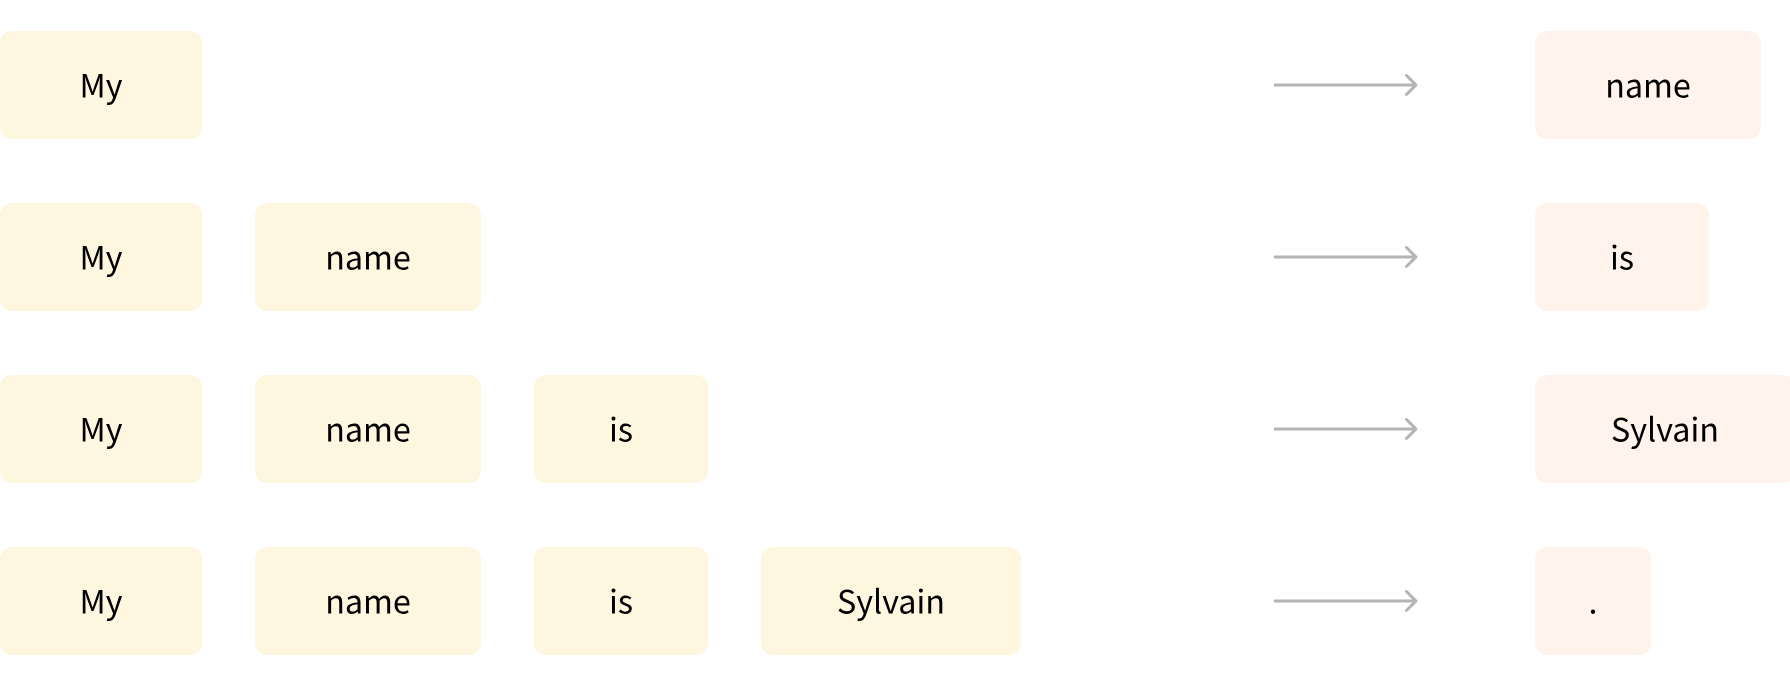

Another example is ***masked language modeling***, in which the model predicts a masked word in the sentence.

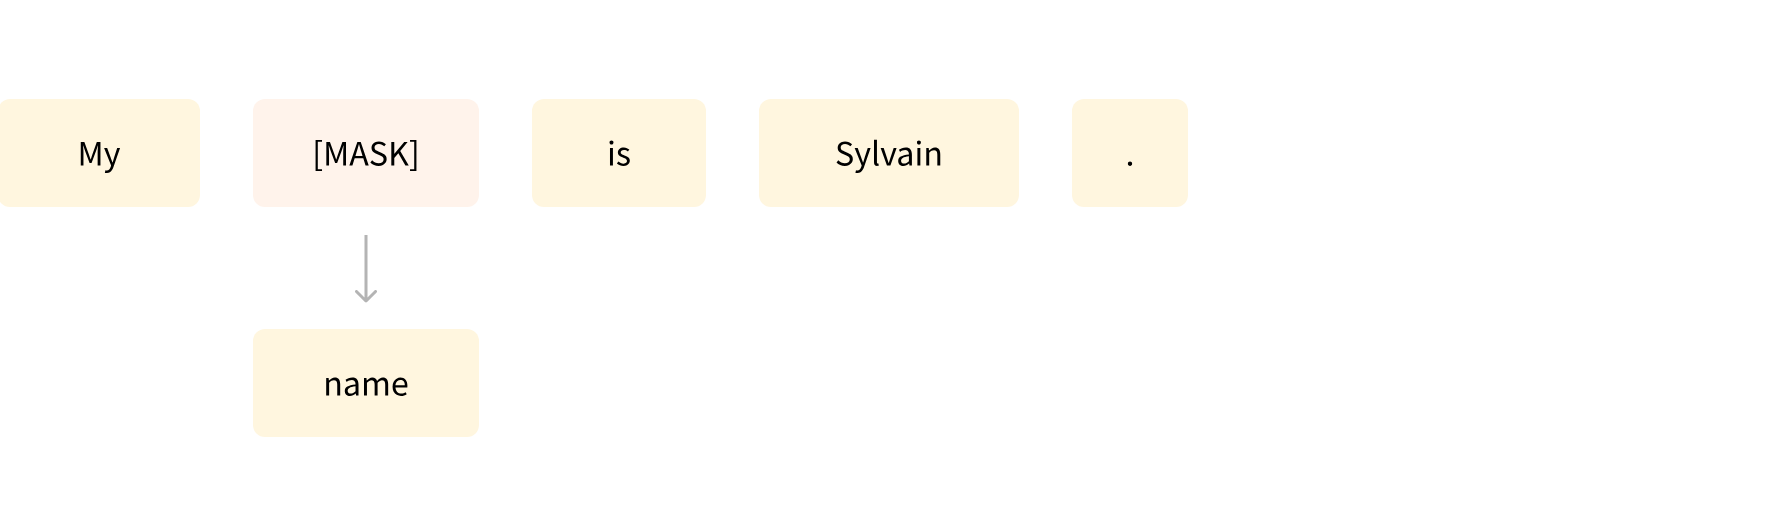

Unfortunately, training a model, especially a large one, requires a large amount of data. This becomes very costly in terms of time and compute resources. It even translates to environmental impact

And this is showing a project for a (very big) model led by a team consciously trying to reduce the environmental impact of pretraining. The footprint of running lots of trials to get the best hyperparameters would be even higher.

Imagine if each time a research team, a student organization, or a company wanted to train a model, it did so from scratch. This would lead to huge, unnecessary global costs!

This is why sharing language models is paramount: sharing the trained weights and building on top of already trained weights reduces the overall compute cost and carbon footprint of the community.

## Transfer Learning

***Pretraining*** is the act of training a model from scratch: the weights are randomly initialized, and the training starts without any prior knowledge.

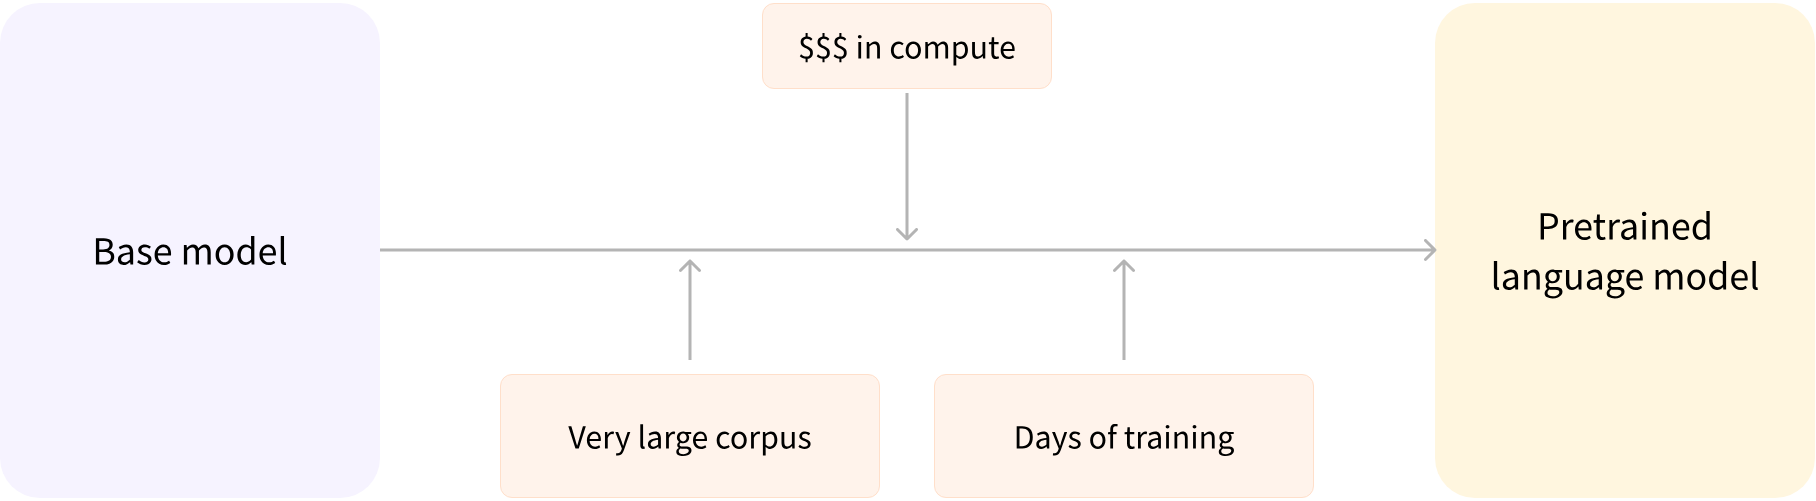

This pretraining is usually done on very large amounts of data. Therefore, it requires a very large corpus of data, and training can take up to several weeks.

***Fine-tuning***, on the other hand, is the training done **after** a model has been pretrained. To perform fine-tuning, you first acquire a pretrained language model, then perform additional training with a dataset specific to your task. Wait — why not simply train the model for your final use case from the start (**scratch**)? There are a couple of reasons.

The pretrained model was already trained on a dataset that has some similarities with the fine-tuning dataset. The fine-tuning process is thus able to take advantage of knowledge acquired by the initial model during pretraining (for instance, with NLP problems, the pretrained model will have some kind of statistical understanding of the language you are using for your task).
Since the pretrained model was already trained on lots of data, the fine-tuning requires way less data to get decent results.
For the same reason, the amount of time and resources needed to get good results are much lower.
For example, one could leverage a pretrained model trained on the English language and then fine-tune it on an arXiv corpus, resulting in a science/research-based model. The fine-tuning will only require a limited amount of data: the knowledge the pretrained model has acquired is “transferred,” hence the term ***transfer learning***.

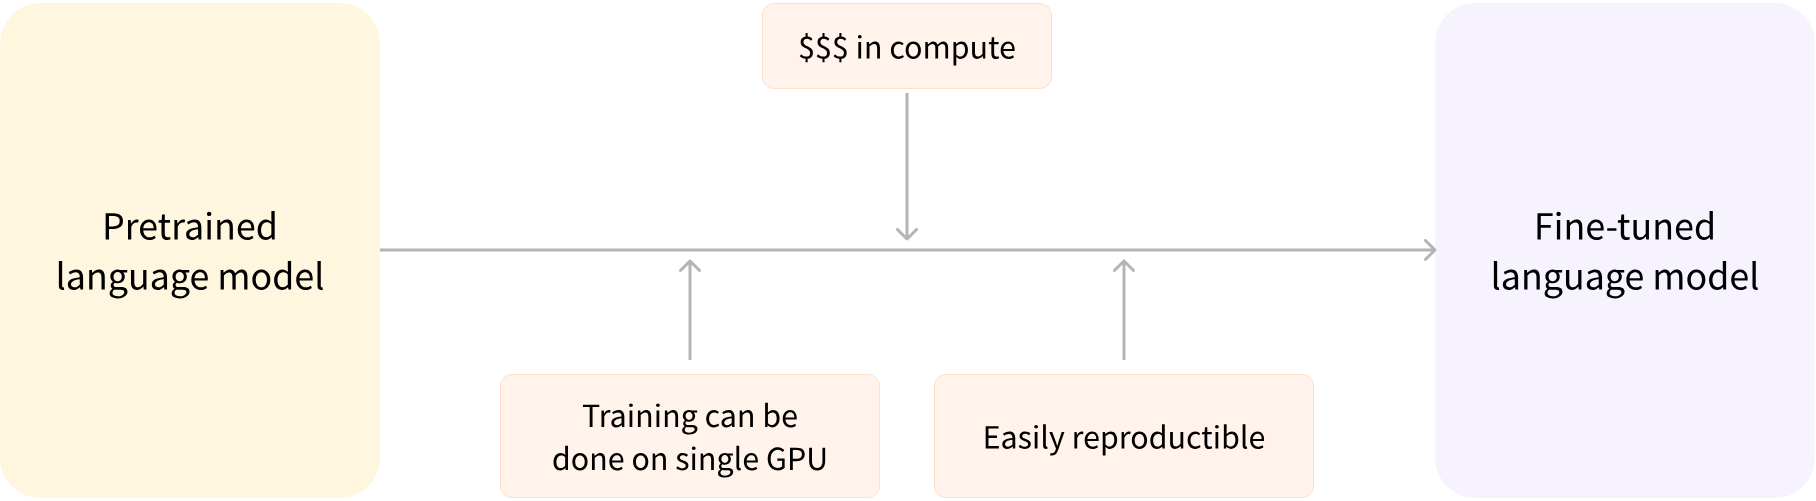

Fine-tuning a model therefore has lower time, data, financial, and environmental costs. It is also quicker and easier to iterate over different fine-tuning schemes, as the training is less constraining than a full pretraining.

This process will also achieve better results than training from scratch (unless you have lots of data), which is why you should always try to leverage a pretrained model — one as close as possible to the task you have at hand — and fine-tune it.

## General Transformer Architecture

### Introduction

In this section, we’ll go over the general architecture of the Transformer model. Don’t worry if you don’t understand some of the concepts; there are detailed sections later covering each of the components.

The model is primarily composed of two blocks:

Encoder (left): The encoder receives an input and builds a representation of it (its features). This means that the model is optimized to acquire understanding from the input.
Decoder (right): The decoder uses the encoder’s representation (features) along with other inputs to generate a target sequence. This means that the model is optimized for generating outputs.

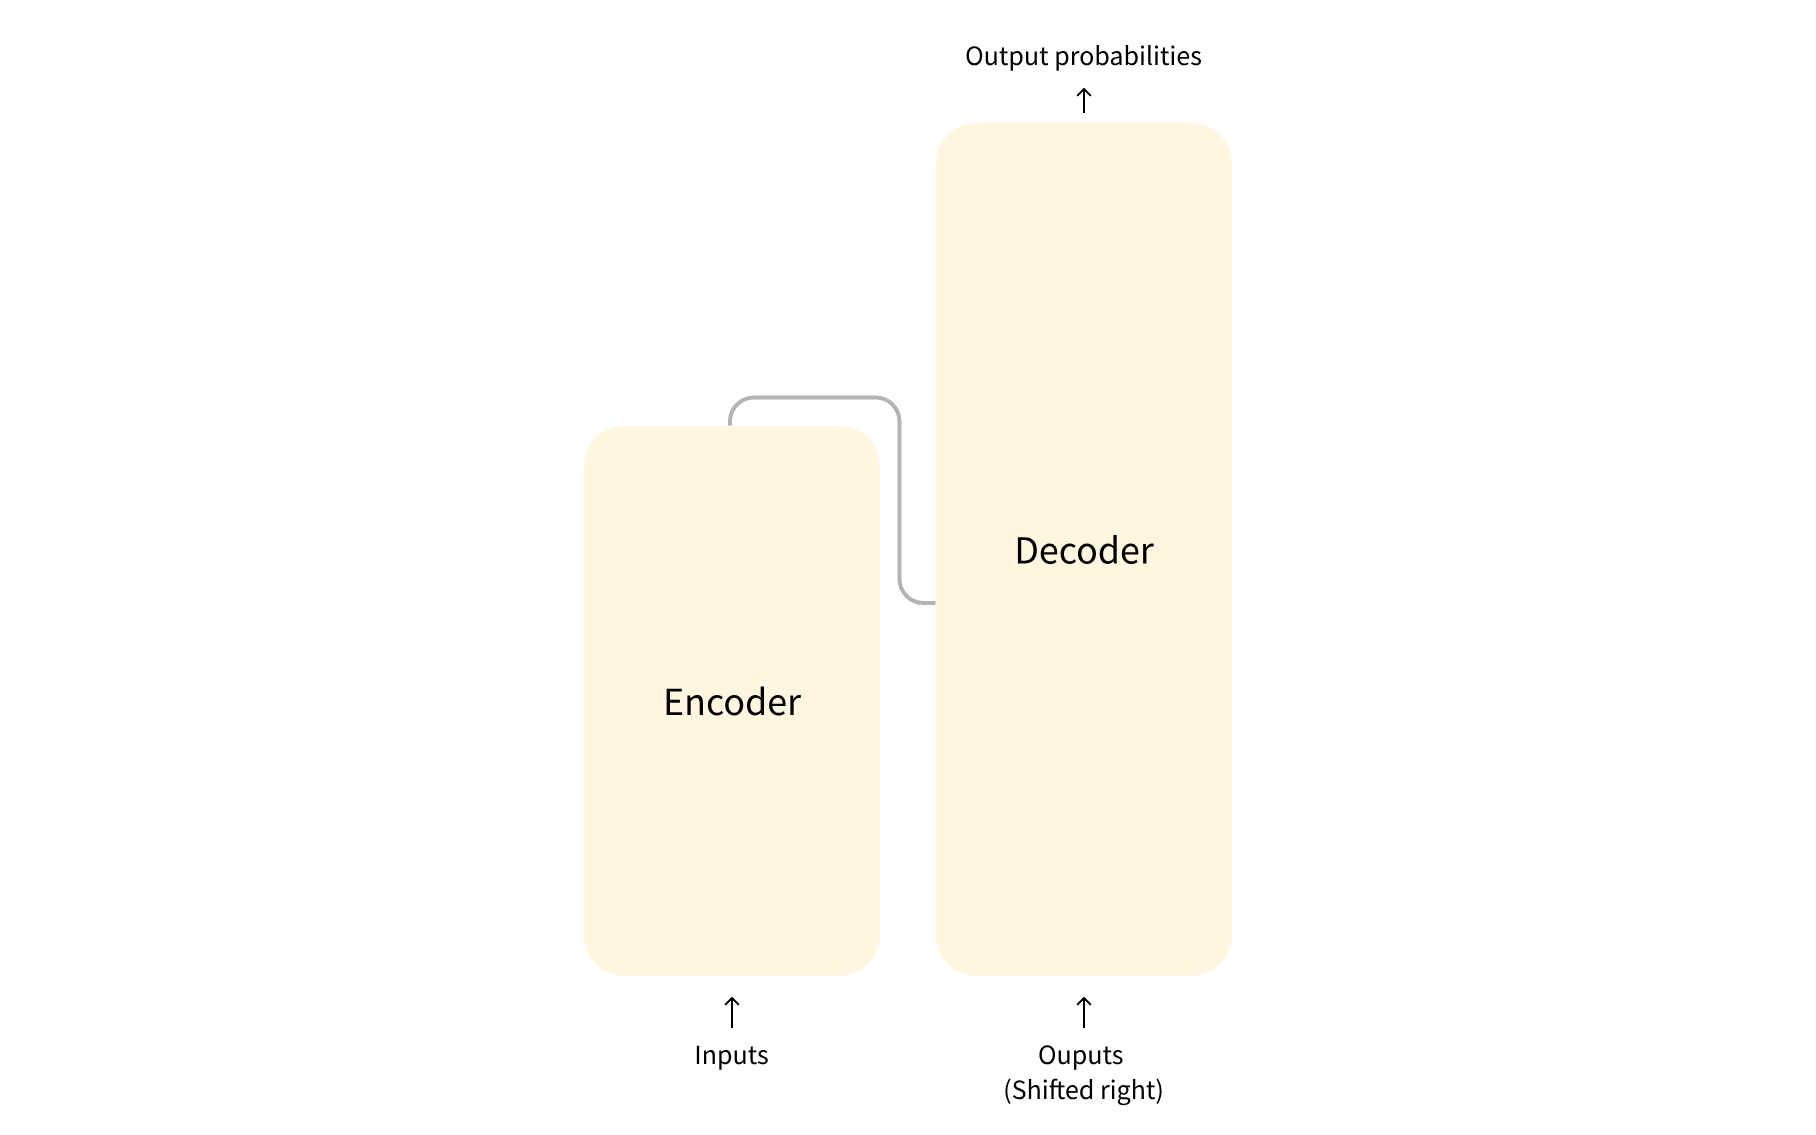

Each of these parts can be used independently, depending on the task:

- Encoder-only models: Good for tasks that require understanding of the input, such as sentence classification and named entity recognition.
- Decoder-only models: Good for generative tasks such as text generation.
- Encoder-Decoder models or sequence-to-sequence models: Good for generative tasks that require an input, such as translation or summarization.

We will dive into those architectures independently in later sections.

### Attention Layers

A key feature of Transformer models is that they are built with special layers called attention layers. In fact, the title of the paper introducing the Transformer architecture was “Attention Is All You Need”! We will explore the details of attention layers later in the course; for now, all you need to know is that this layer will tell the model to pay specific attention to certain words in the sentence you passed it (and more or less ignore the others) when dealing with the representation of each word.

To put this into context, consider the task of translating text from English to French. Given the input “You like this course”, a translation model will need to also attend to the adjacent word “You” to get the proper translation for the word “like”, because in French the verb “like” is conjugated differently depending on the subject. The rest of the sentence, however, is not useful for the translation of that word. In the same vein, when translating “this” the model will also need to pay attention to the word “course”, because “this” translates differently depending on whether the associated noun is masculine or feminine. Again, the other words in the sentence will not matter for the translation of “course”. With more complex sentences (and more complex grammar rules), the model would need to pay special attention to words that might appear farther away in the sentence to properly translate each word.

The same concept applies to any task associated with natural language: a word by itself has a meaning, but that meaning is deeply affected by the context, which can be any other word (or words) before or after the word being studied.

Now that you have an idea of what attention layers are all about, let’s take a closer look at the Transformer architecture.

### The Original Architecture

The Transformer architecture was originally designed for translation. During training, the encoder receives inputs (sentences) in a certain language, while the decoder receives the same sentences in the desired target language. In the encoder, the attention layers can use all the words in a sentence (since, as we just saw, the translation of a given word can be dependent on what is after as well as before it in the sentence). The decoder, however, works sequentially and can only pay attention to the words in the sentence that it has already translated (so, only the words before the word currently being generated). For example, when we have predicted the first three words of the translated target, we give them to the decoder which then uses all the inputs of the encoder to try to predict the fourth word.

To speed things up during training (when the model has access to target sentences), the decoder is fed the whole target, but it is not allowed to use future words (if it had access to the word at position 2 when trying to predict the word at position 2, the problem would not be very hard!). For instance, when trying to predict the fourth word, the attention layer will only have access to the words in positions 1 to 3.

The original Transformer architecture looked like this, with the encoder on the left and the decoder on the right:

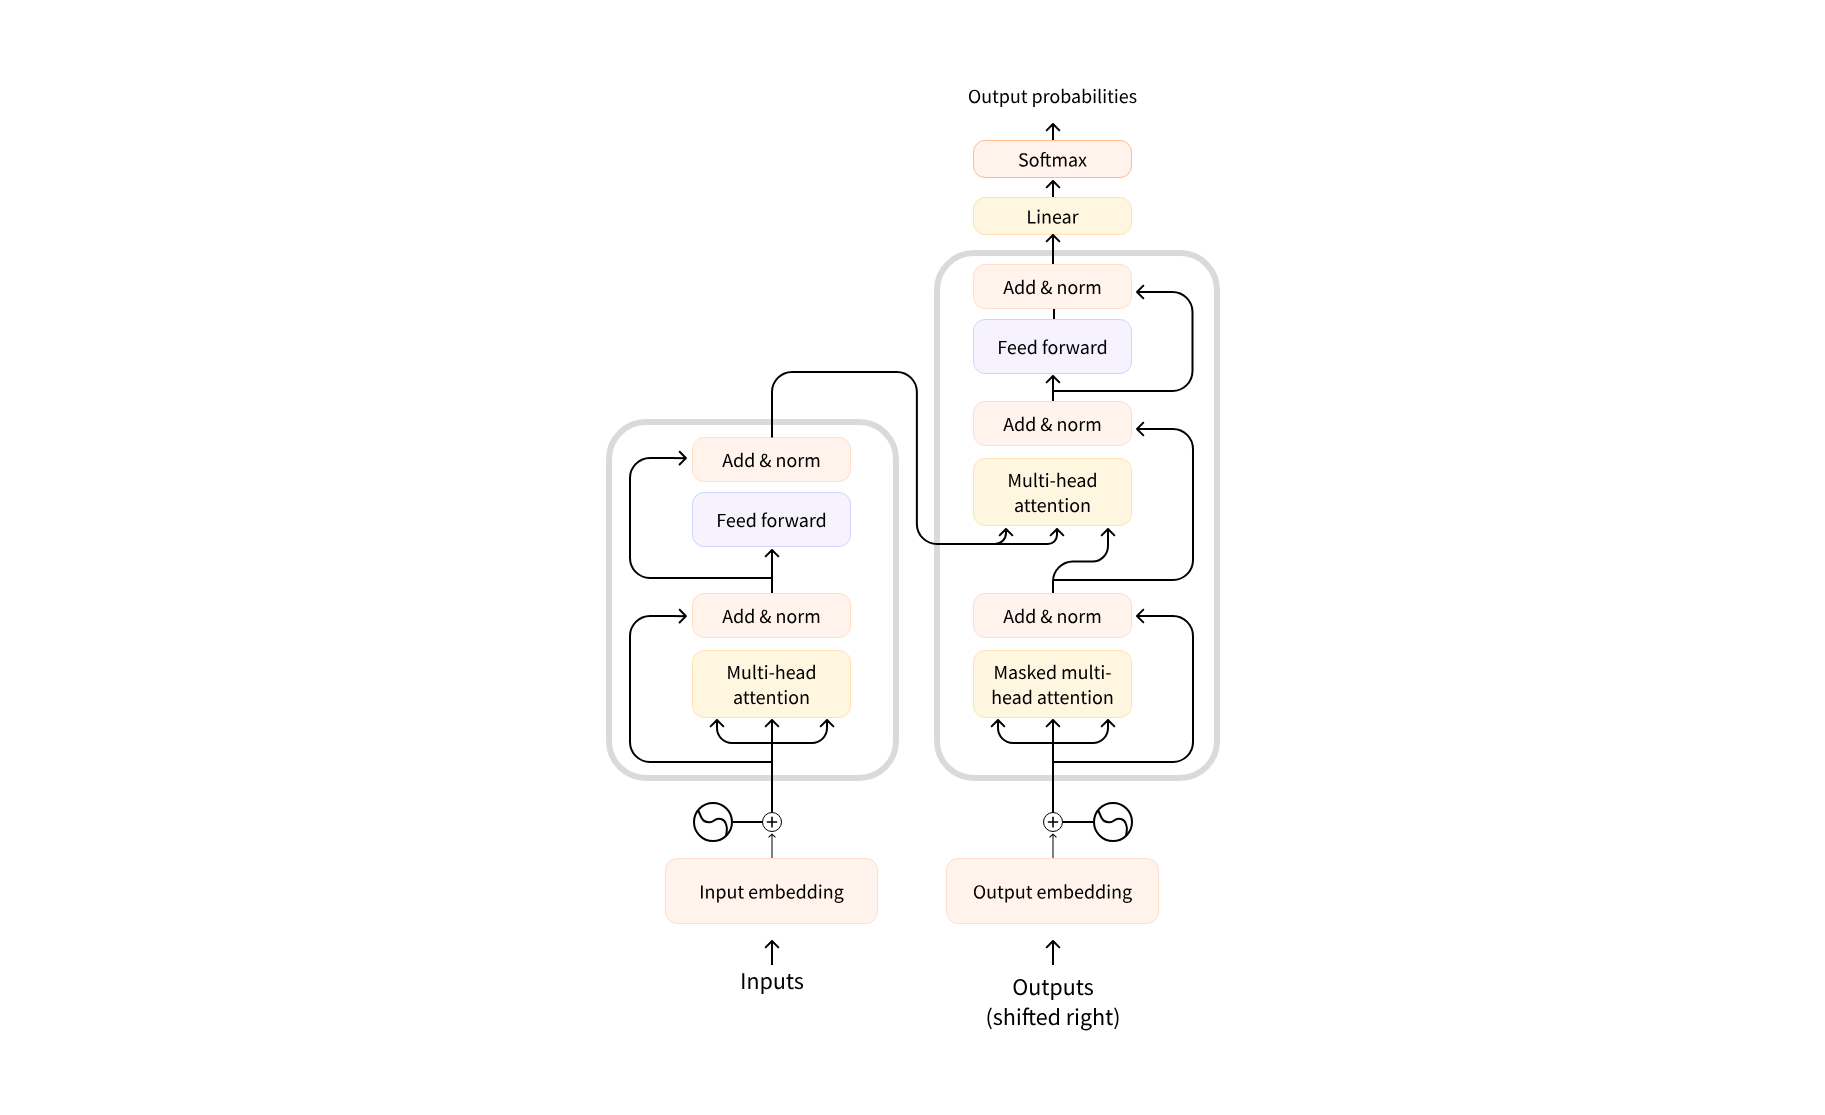

Note that the first attention layer in a decoder block pays attention to all (past) inputs to the decoder, but the second attention layer uses the output of the encoder. It can thus access the whole input sentence to best predict the current word. This is very useful as different languages can have grammatical rules that put the words in different orders, or some context provided later in the sentence may be helpful to determine the best translation of a given word.

The ***attention mask*** can also be used in the encoder/decoder to prevent the model from paying attention to some special words — for instance, the special padding word used to make all the inputs the same length when batching together sentences.

### Architectures vs. Checkpoints

As we dive into Transformer models in this course, you'll see mentions of architectures and checkpoints as well as models. These terms all have slightly different meanings:

- **Architecture**: This is the skeleton of the model — the definition of each layer and each operation that happens within the model.
- **Checkpoints**: These are the weights that will be loaded in a given architecture.
- **Model**: This is an umbrella term that isn't as precise as "architecture" or "checkpoint": it can mean both. This course will specify architecture or checkpoint when it matters to reduce ambiguity.

For example, BERT is an architecture while `bert-base-cased`, a set of weights trained by the Google team for the first release of BERT, is a checkpoint. However, one can say "the BERT model" and "the bert-base-cased model".

### Encoder (Auto-Encoding) Models

Encoder models use only the encoder of a Transformer model. At each stage, the attention layers can access all the words in the initial sentence. These models are often characterized as having "bi-directional" attention, and are often called ***auto-encoding models***.

The pretraining of these models usually revolves around somehow corrupting a given sentence (for instance, by masking random words in it) and tasking the model with finding or reconstructing the initial sentence.

Encoder models are best suited for tasks requiring an understanding of the full sentence, such as sentence classification, named entity recognition (and more generally word classification), and extractive question answering.

Representatives of this family of models include: ALBERT, BERT, DistilBERT, ELECTRA, RoBERTa, etc.

### Decoder (Auto-Regressive) Models

Decoder models use only the decoder of a Transformer model. At each stage, for a given word the attention layers can only access the words positioned before it in the sentence. These models are often called ***auto-regressive models***.

The pretraining of decoder models usually revolves around predicting the next word in the sentence.

These models are best suited for tasks involving text generation.

Representatives of this family of models include: CTRL, GPT, GPT-2, Transformer XL, etc.

### Encoder-Decoder (Sequence-to-Sequence) Models

Encoder-decoder models (also called ***sequence-to-sequence models***) use both parts of the Transformer architecture. At each stage, the attention layers of the encoder can access all the words in the initial sentence, whereas the attention layers of the decoder can only access the words positioned before a given word in the input.

The pretraining of these models can be done using the objectives of encoder or decoder models, but usually involves something a bit more complex. For instance, T5 is pretrained by replacing random spans of text (that can contain several words) with a single mask special word, and the objective is then to predict the text that this mask word replaces.

Sequence-to-Sequence models are best suited for tasks revolving around generating new sentences depending on a given input, such as summarization, translation, or generative question answering.

Representatives of this family of models include: BART, mBART, Marian, T5, etc.

## Fine-Tuning a Pretrained Model

### Loading the Data

 Before we can fine-tune a pretrained model, we need to download a dataset and prepare it for training. Here we are going to use the Emotions dataset. By default the dataset creates a `train` split in which all of the rows are present.

In [1]:
from datasets import load_dataset

dataset = load_dataset("csv", data_files="data/emotions-dataset.csv")
dataset

DatasetDict({
    train: Dataset({
        features: ['message', 'emotion'],
        num_rows: 12000
    })
})

In [37]:
df = dataset["train"].to_pandas()
df["emotion"].unique()

array(['anger', 'sadness', 'love', 'fear', 'surprise', 'joy'],
      dtype=object)

In [38]:
df

,message,emotion
0,i used to be able to hang around talk with the...,anger
1,i get made to feel left out and unimportant in...,sadness
2,i wasnt going to post today as i am feeling qu...,sadness
3,i feel extremely delicate and a bit helpless,love
4,i feel frightened that i might fail to notice ...,fear
...,...,...
11995,i feel useless for wasting k hours k just for ...,sadness
11996,i feel rushed and pulled and rung out and i kn...,anger
11997,i feel absolutely disgusted,anger
11998,i know that we are all sinners and fall short ...,sadness


 Encode the categories with numeric representations. We can use label encoder for this task.

In [2]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

labels = encoder.fit_transform(dataset["train"]["emotion"])

We will add a new column called `label` for the encoded emotions.

***Note: The `label` should always be a column with this name in order for the trainer to recognize it as the target variable.***

In [3]:
dataset["train"] = dataset["train"].add_column("label", labels)
dataset['train'] = dataset['train'].remove_columns("emotion")
dataset = dataset.rename_column("message", "text")
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 12000
    })
})

Split the dataset into training and testing sets, allocating 80% for training and 20% for testing.

In [4]:
dataset = dataset["train"].train_test_split(test_size=0.2)
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 9600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2400
    })
})

As you can see, we get a DatasetDict object which contains the training set and the test set. Each of those contains 2 features (`text` and `label`) and a variable number of rows, which are the number of elements in each set (so, there are 9,600 pairs of sentences in the training set and 2,400 in the test set).

In [5]:
dataset["train"].features

{'text': Value(dtype='string', id=None),
 'label': Value(dtype='int64', id=None)}

### Preprocessing the Data

To preprocess the dataset, we need to convert the text to numbers the model can make sense of. As you already know, this is done with a tokenizer. We can feed the tokenizer one sentence or a list of sentences, so we can directly tokenize all the first sentences and all the second sentences of each pair like this:

In [7]:
from transformers import AutoTokenizer, DataCollatorWithPadding

checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
tokenized_texts = tokenizer(dataset["train"]["text"])

In [8]:
input = tokenizer("Hi, how are you?")
input

{'input_ids': [101, 7632, 1010, 2129, 2024, 2017, 1029, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}

In [10]:
tokenizer.decode([102])

'[SEP]'

We already discussed the `input_ids` and `attention_mask` keys, but we put off talking about `token_type_ids`. In this example, this is what tells the model which part of the input is the first sentence and which is the second sentence. Here, we work with just one sentence (or text segment).

If we decode the IDs inside input_ids back to words, we will get:

In [11]:
tokenizer.convert_ids_to_tokens(input["input_ids"])

['[CLS]', 'hi', ',', 'how', 'are', 'you', '?', '[SEP]']

So we see the model expects the inputs to be of the form `[CLS]` `sentence1` `[SEP]` `sentence2` `[SEP]` when there are two sentences. But, because we are working with just one sentence, out inpurt isof the form `[CLS]` `sentence1` `[SEP]`.

Note that if you select a different checkpoint, you won’t necessarily have the `token_type_ids` in your tokenized inputs (for instance, they’re not returned if you use a DistilBERT model). They are only returned when the model will know what to do with them, because it has seen them during its pretraining.

Here, BERT is pretrained with token type IDs, and on top of the masked language modeling objective we talked about, it has an additional objective called *next sentence prediction*. The goal with this task is to model the relationship between pairs of sentences.

With next sentence prediction, the model is provided pairs of sentences (with randomly masked tokens) and asked to predict whether the second sentence follows the first. To make the task non-trivial, half of the time the sentences follow each other in the original document they were extracted from, and the other half of the time the two sentences come from two different documents.

In general, you don’t need to worry about whether or not there are `token_type_ids` in your tokenized inputs: as long as you use the same checkpoint for the tokenizer and the model, everything will be fine as the tokenizer knows what to provide to its model.

 As you now know, you need a tokenizer to process the text and include a padding and truncation strategy to handle any variable sequence lengths. To process your dataset in one step, use 🤗 Datasets `map()` method to apply a preprocessing function over the entire dataset.

In [12]:
def tokenize(sample):
    return tokenizer(sample["text"], truncation=True)

This function takes a dictionary (like the items of our dataset) and returns a new dictionary with the keys `input_ids`, `attention_mask`, and `token_type_ids`. Note that it also works if the `sample` dictionary contains several samples (each key as a list of sentences) since the `tokenizer` works on lists of pairs of sentences. This will allow us to use the option `batched=True` in our call to `map()`, which will greatly speed up the tokenization. The tokenizer is backed by a tokenizer written in Rust from the 🤗 Tokenizers library. This tokenizer can be very fast, but only if we give it lots of inputs at once.

Here is how we apply the tokenization function on all our datasets at once. We’re using `batched=True` in our call to map so the function is applied to multiple elements of our dataset at once, and not on each element separately. This allows for faster preprocessing.

In [13]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
tokenized_dataset = dataset.map(tokenize, batched=True)

Map:   0%|          | 0/9600 [00:00<?, ? examples/s]

Map:   0%|          | 0/2400 [00:00<?, ? examples/s]

In [14]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

The way the 🤗 Datasets library applies this processing is by adding new fields to the datasets, one for each key in the dictionary returned by the preprocessing function:

In [15]:
tokenized_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 9600
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 2400
    })
})

Our tokenize_function returns a dictionary with the keys `input_ids`, `attention_mask`, and `token_type_ids`, so those three fields are added to all splits of our dataset. Note that we could also have changed existing fields if our preprocessing function returned a new value for an existing key in the dataset to which we applied `map()`.

### Fine-Tune a Transformer with the Trainer API

 🤗 Transformers provides a Trainer class optimized for training 🤗 Transformers models, making it easier to start training without manually writing your own training loop. The Trainer API supports a wide range of training options and features such as logging, gradient accumulation, and mixed precision.

The first step before we can define our `Trainer` is to instantiate a <a href="https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.TrainingArguments">`TrainingArguments`</a> object that will contain all the <a href="https://huggingface.co/docs/transformers/main_classes/trainer#transformers.TrainingArguments">hyperparameters</a> the `Trainer` will use for training and evaluation. The only argument you have to provide is a directory where the trained model will be saved, as well as the checkpoints along the way. For all the rest, you can leave the defaults, which should work pretty well for a basic fine-tuning. For this tutorial you can start with the default training hyperparameters, but feel free to experiment with these to find your optimal settings. Specify where to save the checkpoints from your training and the learning rate:

In [16]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="trainer",
    eval_strategy="epoch",
    per_device_train_batch_size=8,  # batch size for training
    per_device_eval_batch_size=8,  # batch size for evaluation
    metric_for_best_model="f1",
)

The second step is to define our model.

We will use the `AutoModelForSequenceClassification` class, with 6 labels ("anger", "sadness", "love", "fear", "surprise", "joy"):

In [17]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=6)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


 

You will see a warning about some of the pretrained weights not being used and some weights being randomly
initialized. Don't worry, this is completely normal! The pretrained head of the BERT model is discarded, and replaced with a randomly initialized classification head. You will fine-tune this new model head on your sequence classification task, transferring the knowledge of the pretrained model to it.

Once we have our model, we can define a `Trainer` by passing it all the objects constructed up to now — the `model`, the `training_args`, the training and validation datasets, and our `tokenizer`:

In [18]:
import evaluate
import numpy as np

metric = evaluate.load("f1")

<a href="https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.Trainer">`Trainer`</a> does not automatically evaluate model performance during training. You'll need to pass Trainer a function to compute and report metrics. The <a href="https://huggingface.co/docs/evaluate/index">🤗 Evaluate</a> library provides a simple f1 function you can load with the <a href="https://huggingface.co/docs/evaluate/main/en/package_reference/loading_methods#evaluate.load">evaluate.load</a> (see this <a href="https://huggingface.co/docs/evaluate/a_quick_tour">quicktour</a> for more information) function:

In [19]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels, average="weighted")

In [21]:
from transformers import Trainer

trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    compute_metrics=compute_metrics,
    data_collator=data_collator,
)

 Set the device to GPU if cuda is available. If not, we will fine-tune the model on cpu, which is very slow.

In [23]:
import torch

In [24]:
torch.cuda.is_available()

True

In [25]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [26]:
device

'cuda'

In [27]:
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

To fine-tune the model on our dataset, we just have to call the train() method of our Trainer:

In [28]:
trainer.train()

Epoch,Training Loss,Validation Loss,F1
1,0.359100,0.190316,0.941960
2,0.192700,0.181940,0.943241
3,0.121700,0.216934,0.941140


TrainOutput(global_step=3600, training_loss=0.275114643573761, metrics={'train_runtime': 464.2609, 'train_samples_per_second': 62.034, 'train_steps_per_second': 7.754, 'total_flos': 616392672632064.0, 'train_loss': 0.275114643573761, 'epoch': 3.0})

In [29]:
trainer.evaluate()

{'eval_loss': 0.21693377196788788,
 'eval_f1': 0.9411397309049696,
 'eval_runtime': 6.1669,
 'eval_samples_per_second': 389.176,
 'eval_steps_per_second': 48.647,
 'epoch': 3.0}

In [30]:
predictions = trainer.predict(tokenized_dataset["test"])

In [31]:
predictions

PredictionOutput(predictions=array([[-2.785364  ,  2.9672668 , -1.2062981 , -2.1670182 , -2.1702397 ,
         5.957295  ],
       [-1.4427673 , -0.9517515 , -0.81115776, -1.4134634 ,  7.8210883 ,
        -1.7123109 ],
       [-2.1247048 , -2.41647   ,  7.8401675 , -1.1909778 , -1.5133809 ,
        -1.7903858 ],
       ...,
       [-2.9001558 , -2.985609  ,  2.0399008 ,  6.856194  , -2.207935  ,
        -1.9369646 ],
       [ 2.992594  ,  2.3397486 ,  1.3339609 , -3.4508302 ,  0.04575282,
        -3.3699648 ],
       [-3.0413184 , -3.0556214 ,  3.2634528 ,  5.8193855 , -2.1759768 ,
        -1.9039536 ]], shape=(2400, 6), dtype=float32), label_ids=array([5, 4, 2, ..., 3, 1, 3], shape=(2400,)), metrics={'test_loss': 0.21693377196788788, 'test_f1': 0.9411397309049696, 'test_runtime': 6.7827, 'test_samples_per_second': 353.839, 'test_steps_per_second': 44.23})

The PredictionOutput object holds the array of predictions per class and the original values of the labels (label_ids) In order to get the prediction for the class instead of the logits, we need to get the index of the maximum value from the prediction array.

In [32]:
logits, labels = predictions.predictions, predictions.label_ids
preds = np.argmax(logits, axis=-1)

In [33]:
preds

array([5, 4, 2, ..., 3, 0, 3], shape=(2400,))

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
print(classification_report(labels, preds))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       372
           1       0.96      0.85      0.90       428
           2       0.98      0.92      0.95       401
           3       0.93      0.98      0.95       403
           4       0.96      0.98      0.97       404
           5       0.89      1.00      0.94       392

    accuracy                           0.94      2400
   macro avg       0.94      0.94      0.94      2400
weighted avg       0.94      0.94      0.94      2400



Text(0.5, 1.0, 'Confusion Matrix')

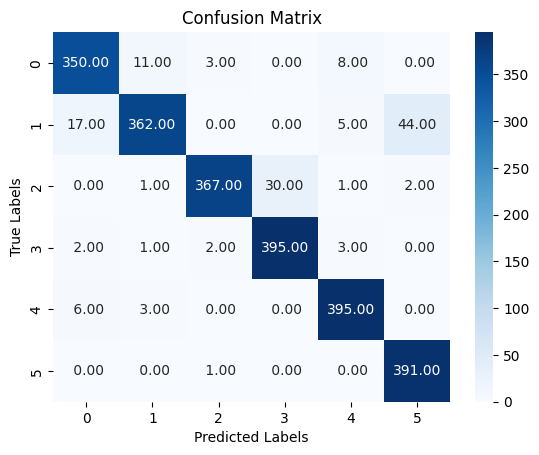

In [36]:
sns.heatmap(confusion_matrix(labels, preds), annot=True, fmt="5.2f", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

In [38]:
encoder.inverse_transform([0, 1, 2, 3, 4, 5])

array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'], dtype='<U8')